# Stats 218 - Final Project

# Part 1: Inference on Graphs
## Peter Racioppo

In [ ]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

import random
import math
from scipy.linalg import eig
import networkx as nx
plt.rcParams["figure.figsize"] = (10,6)

## Basic Matrix Stuff

In [ ]:
# Build random matrix
def f_Random_Matrix(n,k):
    u = np.random.choice([0,1],size=n**2,p=[1-k/n,k/n])
    G = np.reshape(u,[n,n])
    return G

In [ ]:
# Convert an adjacency matrix to a stochastic matrix:
# Add a small, nonzero probability of transitioning
# to a vertex that is not connected by an edge
def f_Stochastic_Mat(G,p=0.90):
    n = np.shape(G)[0]
    r = G.sum(axis=1)
    M = np.zeros((n,n))
    for i in np.arange(n):
        for j in np.arange(n):
            if r[i] != 0:
                M[i,j] = p*G[i,j]/max(1,r[i]) + (1-p)/n
            else:
                M[i,j] = 1/n
        
    # Do rows sum to 1?
    if sum(M.sum(axis=1)-1) > 1e-10:
        print("Error.")
        
    return M

In [ ]:
# Convert an adjacency matrix to a stochastic matrix:
def f_Stochastic_Mat2(G):
    n = np.shape(G)[0]
    r = G.sum(axis=1)
    M = np.zeros((n,n))
    for i in np.arange(n):
        for j in np.arange(n):
            if r[i] != 0:
                M[i,j] = G[i,j]/max(1,r[i])
        
    # Do rows sum to 1?
    if sum(M.sum(axis=1)-1) > 1e-10:
        print("Error.")
        
    return M

In [ ]:
# This function plots a network with vertex colorings
def f_Plot_Graph(G,state,node_size=100):
  color_map = []
  for vertex in state:
      if vertex == 1:
          color_map.append('blue')
      else: 
          color_map.append('green')      
  fig = plt.figure()
  nx.draw(nx.from_numpy_matrix(G), node_size = node_size, node_color=color_map, with_labels=False)
  plt.show()

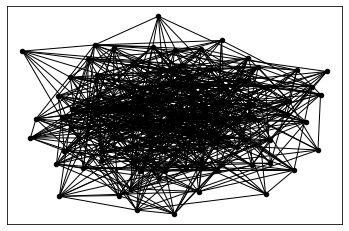

In [ ]:
# Generate random matrix and plot:

n = 100 # Number of vertices
k = 8 # Average number of (directed) edges per vertex
G = f_Random_Matrix(n,k) # Make random matrix
Gs = ((G+G.T)>0)*1 # Make undirected version
Ms = f_Stochastic_Mat(Gs) # Make stochastic matrix
# M.sum(axis=1)

nx.draw_networkx(nx.from_numpy_matrix(Gs),with_labels=False,node_size=20,node_color='k')
plt.show()

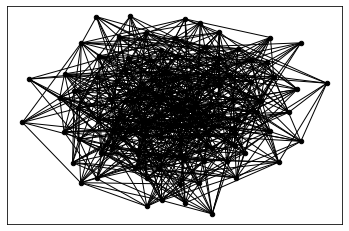

In [ ]:
Gs = ((G+G.T)>0)*1 # Make undirected version
nx.draw_networkx(nx.from_numpy_matrix(G),with_labels=False,node_size=20,node_color='k')
plt.show()

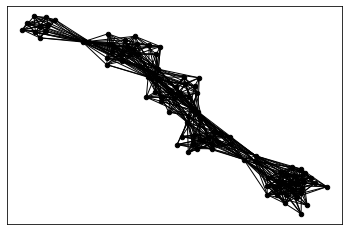

In [ ]:
# Generate random matrix with five overlapping clusters:
n = 100 # Number of vertices
k = 7 # Average number of (directed) edges per vertex
Gb = np.eye(n,n)
# Define clusters:
Gb[0:30,0:30] = f_Random_Matrix(30,k)
Gb[27:50,27:50] = f_Random_Matrix(23,k)
Gb[45:70,45:70] = f_Random_Matrix(25,k)
Gb[65:90,65:90] = f_Random_Matrix(25,k)
Gb[88:100,88:100] = f_Random_Matrix(12,k)
Gbs = ((Gb+Gb.T)>0)*1 # Make undirected version

nx.draw_networkx(nx.from_numpy_matrix(Gbs),with_labels=False,node_size=20,node_color='k')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving adj1.csv to adj1.csv


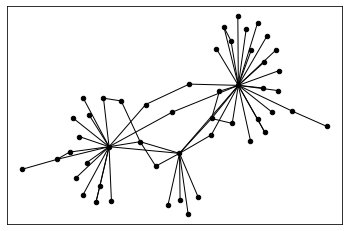

In [ ]:
import csv
file_CSV = open('adj1.csv')
data_CSV = csv.reader(file_CSV)
WE_d = np.array(list(data_CSV))
WE = WE_d[1:51,0:50].astype(int)

nx.draw_networkx(nx.from_numpy_matrix(WE),with_labels=False,node_size=20,node_color='k')
plt.show()

## Page Rank

In [ ]:
# This function computes the stationary distribution
# of a matrix K, using one of three methods.
def f_Stationary(K,method=3):
  if method == 1:
    # METHOD 1: Using left and right eigenvectors:
    # Get eigenvals and left and right eigenvecs:
    w, vl, vr = eig(K, left=True)
    # Get indices of eigenvals by largest modulus:
    idx = np.abs(w).argsort()[::-1]
    # Sort eigenvals/vecs by largest modulus:
    w = w[idx]
    vl = vl[:,idx]
    vr = vr[:,idx]
    u1 = vl[:,0] # First left eigenvec
    v1 = vr[:,0] # First right eigenvec
    # K^n is the outer product of the left and right eigenvectors
    Kn = np.real(np.multiply.outer(v1, u1))
    pi = Kn[0,:] # Stationary distribution
    pi = pi/np.sum(pi)
  
  if method == 2:
    # METHOD 2: Brute force (compute K^n)
    nu = np.ones(np.shape(K)[0])/np.shape(K)[0]
    Kn2 = np.linalg.matrix_power(K,1000)
    pi = np.matmul(nu,Kn2) # Stationary distribution
    pi = pi/np.sum(pi)

  if method == 3:
    # METHOD 3: solve a system of equations
    import warnings
    warnings.filterwarnings("ignore")
    n = K.shape[0]
    A = (np.eye(n) - K).T
    a = np.vstack((A, np.ones(n)))
    b = np.matrix([0]*n + [1]).T
    pi = np.squeeze(np.asarray(np.linalg.lstsq(a,b)[0].T))
  
  return pi

In [ ]:
# The stationary distribution of the Markov chain over G is: Π = deg(v)/2m
def f_Stationary_closed_form(G):
  edges_out = np.sum(G,axis=1) # For each row, sum all the columns
  edges_in = np.sum(G,axis=0) # For each column, sum all the rows
  deg = edges_out + edges_in

  m = np.sum(G) + sum(np.diag(G))
  pi = deg/(2*m)
  return deg, m, pi

8.673617379884035e-18
-1.1709383462843448e-17


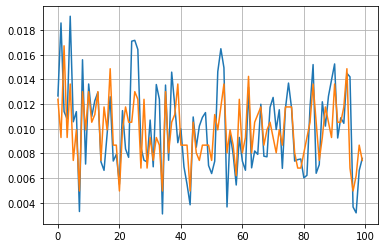

In [ ]:
# All three numerical methods give the same result for the 
# stationary distribution, but the closed form is different.
M2 = f_Stochastic_Mat2(G)
stat1 = f_Stationary(M2,method=1)
stat2 = f_Stationary(M2,method=2)
stat3 = f_Stationary(M2,method=3)
_, _, stat4 = f_Stationary_closed_form(G)

print(sum(stat1-stat2))
print(sum(stat1-stat3))

plt.plot(stat1)
plt.plot(stat4)
plt.grid()
plt.show()

In [ ]:
# Computes page rank of vertices in adjacency matrix G
def f_Page_Rank(G):
    M = f_Stochastic_Mat(G)
    v = f_Stationary(M)
    page_rank = np.abs(v).argsort()[::-1]
    v_sort = v[page_rank]
    return page_rank, v, v_sort

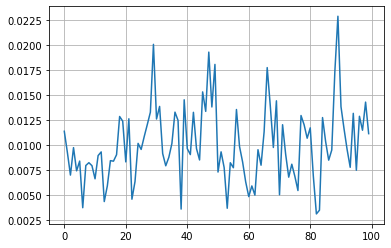

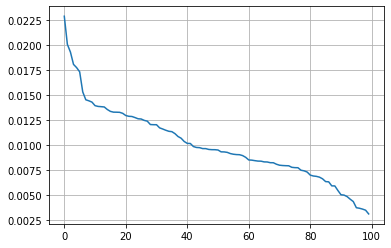

In [ ]:
# Run page rank on the random graph with five clusters:

page_rank, v, v_sort = f_Page_Rank(Gb)

# Plot page ranks of the vertices:
fig = plt.figure()
ax = fig.add_subplot()
# ax.set_yscale('log')
plt.plot(v)
plt.grid()

# Plot sorted version:
fig = plt.figure()
ax = fig.add_subplot()
# ax.set_yscale('log')
plt.plot(v_sort)
plt.grid()


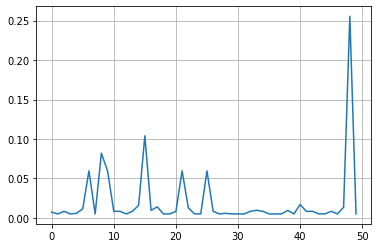

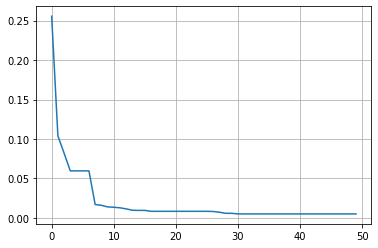

In [ ]:
# Run page rank:

page_rank, v, v_sort = f_Page_Rank(WE)

# Plot page ranks of the vertices:
fig = plt.figure()
ax = fig.add_subplot()
# ax.set_yscale('log')
plt.plot(v)
plt.grid()

# Plot sorted version:
fig = plt.figure()
ax = fig.add_subplot()
# ax.set_yscale('log')
plt.plot(v_sort)
plt.grid()

## Convergence of Markov Chains
### In this section, we write functions to compute the bottleneck and conductance of an arbitrary graph, and verify Poincare's and Cheeger's inequalities. These inequalities bound lambda_slem, the second-largest eigenvalue modulus, which in turn bounds MCMC convergence by the Diaconis-Hanlon bound.

In [ ]:
# # Example matrix
# K = np.array([[0.1, 0.8, 0.1, 0.0, 0.0],
#               [0.3, 0.0, 0.7, 0.0, 0.0],
#               [0.1, 0.6, 0.0, 0.3, 0.0],
#               [0.0, 0.0, 0.1, 0.6, 0.3],
#               [0.0, 0.0, 0.2, 0.4, 0.4]])

K = np.array([[0, 119, 73.5, 0, 237+190+55.8],
              [499, 0, 155, 96.9, 282+107],
              [135, 139, 0, 0, 51.5+41.1+31.6],
              [132, 109, 0, 0, 121+93.6+93.4],
              [2730-499-135-132, 2133-119-139-109, 653+190-73.5-155, 1483-96.9, 0]])

row_sums = np.sum(K,axis=0)
col_sums = np.sum(K,axis=1)

# print(K)
# print(row_sums)
# print(col_sums)

K = (K.T/col_sums).T
K

array([[0.        , 0.17621798, 0.10884052, 0.        , 0.71494151],
       [0.4377577 , 0.        , 0.13597684, 0.08500746, 0.34125801],
       [0.33902562, 0.34907082, 0.        , 0.        , 0.31190357],
       [0.24043716, 0.19854281, 0.        , 0.        , 0.56102004],
       [0.34272153, 0.30817017, 0.10723135, 0.24187694, 0.        ]])

In [ ]:
G = np.double((K>0)) # Adjacency matrix of K:
num_edges = int(np.sum(G)) # Number of edges
num_edges

17

### We calculate the invariant probability π(x) for the five states and compute the value of λ_slem, the second largest eigenvalue modulus.

In [ ]:
pi = f_Stationary(K)
print("The invariant probability is:")
print(pi)

# w: The eigenvalues, each repeated according to its multiplicity.
w, vl, vr = eig(G, left=True)
# Get indices of eigenvals by largest modulus:
idx = np.abs(w).argsort()[::-1]
# Sort eigenvals/vecs by largest modulus:
w = w[idx]

print("The eigenvalues are:")
print(w)

# λ_slem
lambda_slem = np.abs(w[1])
print("λ_slem = ", lambda_slem)

# 24.08%
# 15.12%
# 6.02%
# 4.56%

# Percent of world GDP by country:
print("Percent of world GDP:")
print(21427700/87751541)
print(14342903/87751541)
print(5081770/87751541)
print(3845630/87751541)

The invariant probability is:
[0.2617902  0.20369219 0.09283344 0.0999685  0.34171568]
The eigenvalues are:
[ 3.44948974+0.j -1.44948974+0.j -1.        +0.j -1.        +0.j
  0.        +0.j]
λ_slem =  1.449489742783179
Percent of world GDP:
0.24418602517760912
0.1634490156702775
0.0579108918440532
0.04382407369917299


### We now compute the edge e = (x,y) which is the bottleneck of G. We then verify the Poincare inequality:
### λ_slem ≤ 1− 1/κ.

### Computing the bottleneck is an NP-hard problem.

In [ ]:
# Find the number of edges in an adjacency matrix and store them in edge_vec.
def f_edges(G):
    n = np.shape(G)[0]
    edge_vec = []
    for i in np.arange(n):
        for j in np.arange(n):
            if G[i,j]==1:
                edge_vec.append([i,j])
    return edge_vec

In [ ]:
edge_vec_G = f_edges(G)

print(edge_vec_G)
print("Number of edges = ", np.shape(edge_vec_G)[0])

[[0, 1], [0, 2], [0, 4], [1, 0], [1, 2], [1, 3], [1, 4], [2, 0], [2, 1], [2, 4], [3, 0], [3, 1], [3, 4], [4, 0], [4, 1], [4, 2], [4, 3]]
Number of edges =  17


In [ ]:
# Build G0 matrix:
# (Each vertex in G0 is an edge in G. Vertices in G0 have an edge between them
# if and only if the corresponding edges in G meet at some vertex.)
G0 = np.zeros((num_edges,num_edges))
for i in np.arange(num_edges):
    for j in np.arange(num_edges):
       if edge_vec_G[i][1] == edge_vec_G[j][0]:
            G0[i,j] = 1
G0

array([[0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0

In [ ]:
def f_Plot_Directed_Graph(G0):
    import networkx as nx
    n = np.shape(G0)[0]
    options = {'node_color': 'gray'}
    G = nx.DiGraph()
    for i in range(n):
        for j in range(n):
            if G0[i][j] == 1:
                G.add_edge(i,j)
    import matplotlib.pyplot as plt
    nx.draw(G, with_labels=True, font_weight='bold', **options)
    plt.show()

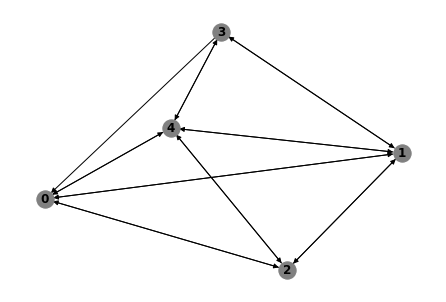

In [ ]:
f_Plot_Directed_Graph(G)

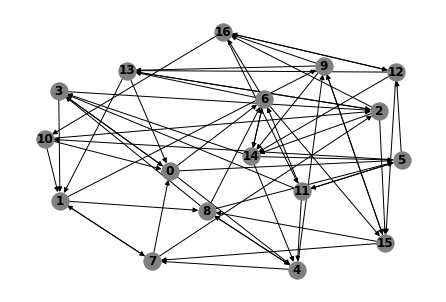

In [ ]:
f_Plot_Directed_Graph(G0)

In [ ]:
# Compute a list of the edges in G0:
edge_vec_G0 = f_edges(G0)

print(edge_vec_G0)
print("Number of edges = ", np.shape(edge_vec_G0)[0])

[[0, 3], [0, 4], [0, 5], [0, 6], [1, 7], [1, 8], [1, 9], [2, 13], [2, 14], [2, 15], [2, 16], [3, 0], [3, 1], [3, 2], [4, 7], [4, 8], [4, 9], [5, 10], [5, 11], [5, 12], [6, 13], [6, 14], [6, 15], [6, 16], [7, 0], [7, 1], [7, 2], [8, 3], [8, 4], [8, 5], [8, 6], [9, 13], [9, 14], [9, 15], [9, 16], [10, 0], [10, 1], [10, 2], [11, 3], [11, 4], [11, 5], [11, 6], [12, 13], [12, 14], [12, 15], [12, 16], [13, 0], [13, 1], [13, 2], [14, 3], [14, 4], [14, 5], [14, 6], [15, 7], [15, 8], [15, 9], [16, 10], [16, 11], [16, 12]]
Number of edges =  59


In [ ]:
# (Finding the set of all simple paths is an NP-hard problem.)

# Build G0 as a networkx object:
import networkx as nx
G0_nx = nx.DiGraph() # Build a directed graph
G0_nx.add_nodes_from(np.arange(num_edges)) # Add 14 nodes
G0_nx.add_edges_from(edge_vec_G0) # Add the edges in G0

# Check the nodes and edges:
# print(G0_nx.number_of_nodes())
# print(G0_nx.number_of_edges())
# G0_nx.edges()

In [ ]:
# Find the simple paths in G0 from source to target:
def f_simple_paths_ij(G0,source,target):
    i = 0
    simple_paths = []
    for path in nx.all_simple_paths(G0, source=source, target=target):
        simple_paths.append(path)
        i += 1
    return simple_paths

In [ ]:
# Find all simple paths in G0
simple_paths_list = []
# Loop through all sources and targets.
for source in np.arange(num_edges):
    for target in np.arange(num_edges):
        if source != target:
            simple_paths_list.append(f_simple_paths_ij(G0_nx,source,target))

simple_paths = np.array([i for sublist in simple_paths_list for i in sublist]) # Flatten the list

# We want the unique simple paths.
# (In fact, we don't need this line. They're unique by construction.)
# simple_paths = np.unique(simple_paths)

L = np.shape(simple_paths)[0] # The number of simple paths in G0
print("There are", L, "simple paths.")

# Convert to array of arrays:
for i in np.arange(L):
    simple_paths[i] = np.array(simple_paths[i])
print(simple_paths)

There are 1695330 simple paths.
[array([0, 3, 1]) array([ 0,  3,  2, 13,  1])
 array([ 0,  3,  2, 14,  4,  7,  1]) ...
 array([16, 12, 14,  6, 13,  2, 15]) array([16, 12, 14,  6, 15])
 array([16, 12, 15])]


In [ ]:
# Given an edge and the list of all simple_paths,
# this function finds all simple paths which do
# not contain that edge:
def f_Gamma_e(edge,simple_paths):
    L = np.shape(simple_paths)[0]
    Paths = []
    for i in np.arange(L):
        if edge not in simple_paths[i]:
            Paths.append(simple_paths[i])
    return Paths

In [ ]:
# This function computes the effective length gamma of a weighted path Gamma.
# Gamma is a weighted path that contains each edge at most one time.
def f_gamma(Gamma,pi,K):
    gamma = 0
    for e in Gamma:
        s = int(e[0])
        t = int(e[1])
        gamma += 1/(pi[s]*K[s,t])
    return gamma

edge_vec_G
print(edge_vec_G)
f_gamma(edge_vec_G,pi,K)

[[0, 1], [0, 2], [0, 4], [1, 0], [1, 2], [1, 3], [1, 4], [2, 0], [2, 1], [2, 4], [3, 0], [3, 1], [3, 4], [4, 0], [4, 1], [4, 2], [4, 3]]


445.9831354182578

In [ ]:
# Convert indices of a path to the actual path in G.
def f_dict(Gamma_xy_idx):
    L_gxy = np.shape(Gamma_xy_idx)[0]
    Gamma_xy = np.zeros((L_gxy,2))
    for i in np.arange(L_gxy):
        Gamma_xy[i,:] = edge_vec_G[Gamma_xy_idx[i]]
    return Gamma_xy

In [ ]:
# Calculate the sum over all valid paths:

k = np.zeros(num_edges)

for edge in np.arange(num_edges):
    Paths = f_Gamma_e(edge,simple_paths)

    k_e = 0
    for Gamma_xy_idx in Paths:
        Gamma_xy = f_dict(Gamma_xy_idx)
        x = int(Gamma_xy[0][0])
        y = int(np.flip(Gamma_xy)[0][0])
        k_e += f_gamma(Gamma_xy,pi,K)*pi[x]*pi[y]

    k[edge] = k_e

k

array([ 3048332.37123081,  3473468.966107  ,  3288037.04148935,
        6277282.20663923,  4361585.41334761,  2738838.80725288,
        4117594.83754728,  5514760.69982182,  3511099.57919421,
        3513105.3349328 , 11322612.93863647,  7762010.0908659 ,
        8693142.00454739,  6384286.11910366,  4075738.62247902,
        4464591.63769059,  3114140.50108337])

The bottleneck is [3, 0]
kappa = 11322612.938636469
λ_slem ≤ 0.9999999116811635


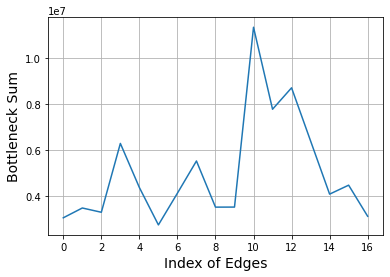

In [ ]:
plt.plot(k)
plt.xlabel('Index of Edges', fontsize=14)
plt.ylabel('Bottleneck Sum', fontsize=14)
plt.grid()

e_star = np.argmax(k)
kappa = np.max(k)
bottleneck = edge_vec_G[e_star]

print("The bottleneck is", bottleneck)
print("kappa =", kappa)
print("λ_slem ≤", 1 - 1/kappa)

### We now calculate the conductance h of the graph G and verify Cheeger’s inequalities:
### 1 − 2h ≤ λ_slem ≤ 1 − h^2/2.
### Computing the conductance of a graph is an NP-hard problem.

In [ ]:
# Computing S and Sc:

# There are 5 states.
states = np.array([0, 1, 2, 3, 4])
n = 2**np.size(states) # The number of subsets
m = int(n/2) # Half the number of subsets

from itertools import chain, combinations
# Computes the powerset of x:
def powerset(x):
    # The powerset as a list:
    ps = list(chain.from_iterable(combinations(x,n) for n in np.arange(np.size(x)+1)))
    return np.array([np.array(xi) for xi in ps]) # Retun as a numpy array of numpy arrays

# We divide the state space Ω into two subspaces such that Ω = S ∪ Sc 
S = powerset(states) # Return the powerset
S = S[1:n] # We can remove the empty set from S.
# Sc = np.flip(S) # Flipped to match the missing parts of S.
n2 = np.shape(S)[0]
print(S)
# print(Sc)

[array([0]) array([1]) array([2]) array([3]) array([4]) array([0, 1])
 array([0, 2]) array([0, 3]) array([0, 4]) array([1, 2]) array([1, 3])
 array([1, 4]) array([2, 3]) array([2, 4]) array([3, 4]) array([0, 1, 2])
 array([0, 1, 3]) array([0, 1, 4]) array([0, 2, 3]) array([0, 2, 4])
 array([0, 3, 4]) array([1, 2, 3]) array([1, 2, 4]) array([1, 3, 4])
 array([2, 3, 4]) array([0, 1, 2, 3]) array([0, 1, 2, 4])
 array([0, 1, 3, 4]) array([0, 2, 3, 4]) array([1, 2, 3, 4])
 array([0, 1, 2, 3, 4])]


In [ ]:
# Computing pi_S:

# Computing the vectors of pi values for each S:
pi_S_vec = []
for i in np.arange(n2):
    idx = S[i]
    pi_S_vec.append(pi[idx])

# Computing the sum of pi_S_vec for each S:
pi_S = np.zeros(n)
for i in np.arange(n2):
    pi_S[i+1] = np.sum(pi_S_vec[i])

pi_S = pi_S[1:n-1] # Remove the empty and complete sets

# Compute the indices where pi(S) <= 1/2
indices = np.where(pi_S <= 1/2)[0]
# Compute the values of pi(S) at these indices:
# pi_S_p = pi_S[indices]
print(indices)
# print(pi_S_p)

[ 0  1  2  3  4  5  6  7  9 10 12 13 14 18 21]


In [ ]:
# This function computes Q(s,sc):
def f_Q(s,sc,K):
    Q = 0
    for x in s:
        for y in sc:
            Q += pi[x]*K[x,y]
    return Q

Conductance = 0.6858898713122543


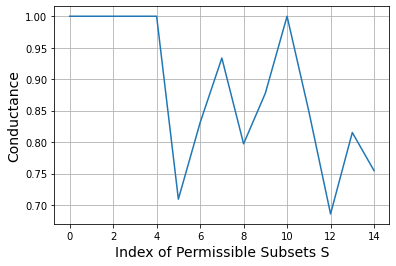

In [ ]:
S2 = S[0:n-2] # Remove the complete set from S.
Sc2 = np.flip(S2) # Flipped to match the missing parts of S.

# Compute the conductance:
h_vec = np.zeros(np.shape(indices))
j = 0
for i in indices:
    h_vec[j] = f_Q(S2[i],Sc2[i],K)/pi_S[i]
    j += 1

# Plot of the conductance:
plt.plot(h_vec)
plt.xlabel('Index of Permissible Subsets S', fontsize=14)
plt.ylabel('Conductance', fontsize=14)
plt.grid()

h = min(h_vec)
print("Conductance =", h)

In [ ]:
lower_bound = 1-2*h
upper_bound = 1 - (h**2)/2

print("Lower bound = ", lower_bound)
print("Upper bound = ", upper_bound)
print("λ_slem = ", lambda_slem)
# print("Cheeger's inequalities are satisfied.")

Lower bound =  -0.37177974262450864
Upper bound =  0.7647775422156295
λ_slem =  1.449489742783179
Cheeger's inequalities are satisfied.


### Now since we know π, we can design the “dream” matrix K* that converges in one step. Then λ_slem = 0 for K*.
### We calculate the conductance h for K* and again verify Cheeger’s inequalities.

In [ ]:
# Construct K* (K* = [pi pi ... pi].T):
K_star = np.zeros((5,5))
for i in np.arange(np.shape(K)[1]):
    K_star[i,:] = pi
K_star

array([[0.2617902 , 0.20369219, 0.09283344, 0.0999685 , 0.34171568],
       [0.2617902 , 0.20369219, 0.09283344, 0.0999685 , 0.34171568],
       [0.2617902 , 0.20369219, 0.09283344, 0.0999685 , 0.34171568],
       [0.2617902 , 0.20369219, 0.09283344, 0.0999685 , 0.34171568],
       [0.2617902 , 0.20369219, 0.09283344, 0.0999685 , 0.34171568]])

Conductance = 0.5345176127707815


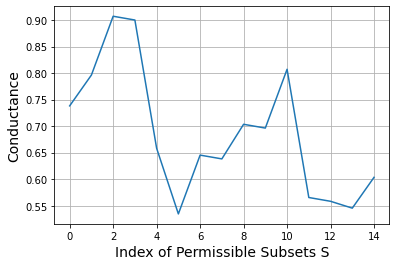

In [ ]:
S2 = S[0:n-2] # Remove the complete set from S.
Sc2 = np.flip(S2) # Flipped to match the missing parts of S.

# Compute the conductance:
h_vec = np.zeros(np.shape(indices))
j = 0
for i in indices:
    h_vec[j] = f_Q(S2[i],Sc2[i],K_star)/pi_S[i]
    j += 1

# Plot of the conductance:
plt.plot(h_vec)
plt.xlabel('Index of Permissible Subsets S', fontsize=14)
plt.ylabel('Conductance', fontsize=14)
plt.grid()

h = min(h_vec)
print("Conductance =", h)

In [ ]:
lower_bound = 1-2*h
upper_bound = 1 - (h**2)/2

print("Lower bound = ", lower_bound)
print("Upper bound = ", upper_bound)
print("λ_slem = ", 0)
print("Cheeger's inequalities are again satisfied.")

Lower bound =  -0.06903522554156294
Upper bound =  0.8571454608189124
λ_slem =  0
Cheeger's inequalities are again satisfied.


## Markov Clustering (MCL)

In [ ]:
# This function normalizes the columns of a matrix G
def f_Normalize(G):
    n = np.shape(G)[0]
    c = np.ndarray.flatten(np.array(G.sum(axis=0))) # Column sum
    M = np.zeros((n,n))
    for j in np.arange(n):
        M[:,j] = np.ndarray.flatten(G[:,j])/max(1,c[j])
        
    return M

In [ ]:
# Expansion operation in MCL algorithm:
# Here, we compute M^e.
def f_Expansion(M,e):
    return np.linalg.matrix_power(M,e)

In [ ]:
# Inflation operation in MCL algorithm:
# Here, we take each element in M to the rth power
# and then renormalize the columns. The effect of
# this operation is to weaken the weak connections
# and strengthen the strong ones, which encourages
# the breaking of the matrix into clusters.
def f_Inflation(M,r):
    R = np.empty_like(M)
    R[:] = M
    n = np.shape(R)[0]
    for j in np.arange(n):
        R[:,j] = M[:,j]**r # Take element-wise power
        R[:,j] /= np.sum(R[:,j]) # Renormalize columns
    
    return R

In [ ]:
# Markov Clustering Algorithm:
# Description at: https://micans.org/mcl/
def f_MCL(G,it=10,e=3,r=4):
    n = np.shape(G)[0]
    for i in np.arange(n):
        # We first add self-loops, to improve convergence.
        G[i,i] = 1

    R = f_Normalize(G) # Normalize the columns

    # Alternate the expansion and inflation steps
    for i in np.arange(it):
        E = f_Expansion(R,e)
        R = f_Inflation(E,r)
        
    return R

In [ ]:
# Converts a stochastic matrix to the corresponding adjacency matrix
def f_Stochastic_to_Adjacency(S,threshold=1e-10):
    # Remove elements smaller than some threshold
    n = np.shape(S)[0]
    adj = np.zeros((n,n))
    for i in np.arange(n):
        for j in np.arange(n):
            if S[i,j] > threshold:
                adj[i,j] = 1
    return S

In [ ]:
# Given an adjacency matrix of disjoint graphs, and a labeling of the vertices,
# returns the indices of each connected component, and the most common label
# in each disjoint graph.
def f_Cluster_Labels(adj,state):
  g = nx.Graph(adj)
  components = [g.subgraph(c).copy() for c in nx.connected_components(g)]
  cluster_label = np.zeros(np.shape(components)[0])
  i = 0
  for cc in components:
      cluster_label[i] = np.int(np.sum(state[cc.nodes]) >= 0)
      i += 1

  cluster_label = cluster_label*2 - 1
  return components, cluster_label

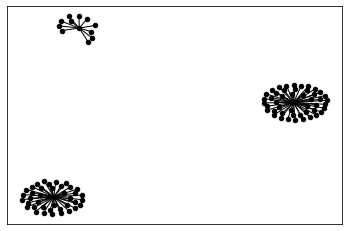

In [ ]:
# Test MCL on our random matrix with five overlapping clusters:

R = f_MCL(Gb,e=3,r=4)
adj = f_Stochastic_to_Adjacency(R)
nx.draw_networkx(nx.from_numpy_matrix(adj),with_labels=False,node_size=20,node_color='k',edge_color="black")

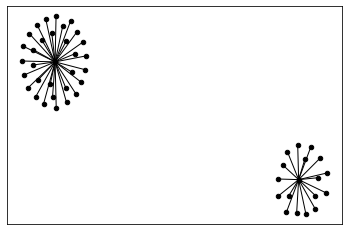

In [ ]:
# Test MCL on the world economy graph:

R = f_MCL(WE,e=3,r=4)
adj = f_Stochastic_to_Adjacency(R)
nx.draw_networkx(nx.from_numpy_matrix(adj),with_labels=False,node_size=20,node_color='k',edge_color="black")

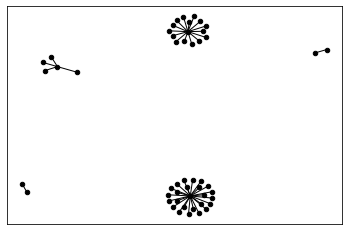

In [ ]:
# Test MCL on the world economy graph:

R = f_MCL(WE,e=2,r=6)
adj = f_Stochastic_to_Adjacency(R)
nx.draw_networkx(nx.from_numpy_matrix(adj),with_labels=False,node_size=20,node_color='k',edge_color="black")

In [ ]:
tn1_deg = [1, 1, 1, 1, 1, 2, 1, 1, 16, 1, 1, 1, 1, 1, 2, 14, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,  10, 1]

In [ ]:
Countries = np.array(["Argentina", "Australia", "Austria", "Bangladesh", "Belgium", "Brazil","Canada", "Chile", "China", "Colombia", "CR", "Denmark", "Egypt", "Finland", "France", "Germany", "Hong Kong", "India", "Indonesia", "Iran", "Ireland", "Israel", "Italy", "Japan","Malaysia", "Mexico", "Netherlands", "Nigeria", "Norway", "Pakistan", "Peru", "Philippines", "Poland", "Portugal", "Romania", "Russia", "South Africa", "Saudi Arabia", "Singapore", "South Korea", "Spain","Sweden","Switzerland" "Taiwan", "Thailand", "Turkey", "UAE", "UK", "US", "Vietnam"])

In [ ]:
Regions = np.array(["South America", "Pacific", "Europe", "Europe", "Europe","South America", "North America", "South America", "Asia", "South America","Europe", "Europe", "Middle East", "Europe", "Europe", "Europe", "Asia", "Asia", "Asia", "Middle East","Europe", "Middle East", "Europe", "Asia", "Asia","North America", "Europe", "Africa", "Europe", "Middle East","South America", "Asia", "Europe", "Europe", "Europe","Europe", "Africa", "Middle East", "Asia", "Asia","Europe", "Europe", "Europe", "Asia", "Asia", "Europe", "Middle East", "Europe", "North America", "South America"])

In [ ]:
L = len(Regions)
s = []
# s = np.zeros(L)
for i in np.arange(L):
    x = Regions[i]
    if x == "North America":
        s.append('b')
    elif x == "Europe":
        s.append('y')
    elif x == "Asia":
        s.append('r')
    elif x == "Africa":
        s.append('limegreen')
    elif x == "South America":
        s.append('orange')
    elif x == "Middle East":
        s.append('darkgreen')
    elif x == "Pacific":
        s.append('purple')

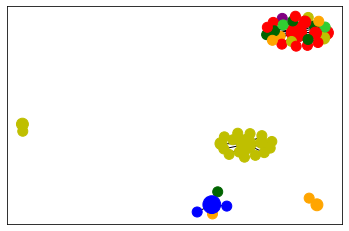

In [ ]:
nx.draw_networkx(nx.from_numpy_matrix(adj),with_labels=False,node_size=np.sqrt(tn1_deg)*100,node_color=s,edge_color="black")